In [7]:
import random
random.seed(42)
import numpy as np
import pandas as pd

In [8]:
rating = pd.read_csv("rating.csv")
rating = rating.sample(10000)
rating.describe()

,userId,movieId,rating
count,10000.000000,10000.000000,10000.000000
mean,69184.056000,8835.260500,3.524500
std,40138.638858,19676.609715,1.044777
min,11.000000,1.000000,0.500000
25%,34484.250000,836.000000,3.000000
50%,69423.500000,2108.000000,3.500000
75%,103827.750000,4644.500000,4.000000
max,138483.000000,129389.000000,5.000000


In [3]:
movie = pd.read_csv("movie.csv")
movie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [9]:
genres_encoded = movie['genres'].str.get_dummies(sep='|')
genres_encoded = genres_encoded.drop("(no genres listed)", axis=1)
movie = pd.concat([movie, genres_encoded], axis=1)
movie = movie.drop(['title', 'genres'], axis=1)
movie.head()

,movieId,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
merged = pd.merge(rating[['userId', 'movieId']], movie, on='movieId')
merged = merged.drop("movieId", axis=1)
merged = merged.groupby('userId').sum()
merged.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
34,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
35,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
47,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
73,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
merged.describe()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000,8942.000000
mean,0.319615,0.248155,0.065869,0.093268,0.416462,0.190114,0.014314,0.487587,0.118765,0.012749,0.080072,0.029412,0.049653,0.084321,0.214270,0.183180,0.297361,0.059606,0.025386
std,0.488606,0.448730,0.249864,0.295781,0.539783,0.401151,0.118790,0.555209,0.327652,0.112195,0.277934,0.170286,0.218267,0.280289,0.424801,0.397108,0.476763,0.240519,0.158012
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,1.000000,4.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000


### GMM Clustering (TBD)

First use gridsearch cv to try several n_components and covariance type. Find the best model with least BIC score and save the model.

In [18]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV


def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)


param_grid = {
    "n_components": range(1, 5),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score
)
grid_search.fit(merged)

GridSearchCV(estimator=GaussianMixture(),
             param_grid={'covariance_type': ['spherical', 'tied', 'diag',
                                             'full'],
                         'n_components': range(1, 5)},
             scoring=<function gmm_bic_score at 0x7ff6763a2560>)

In [19]:
import pandas as pd

df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = -df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df.sort_values(by="BIC score").head()

,Number of components,Type of covariance,BIC score
13,2,full,-69724.677452
9,2,diag,-57747.752969
7,4,tied,4460.381114
6,3,tied,7257.224075
5,2,tied,7671.754281


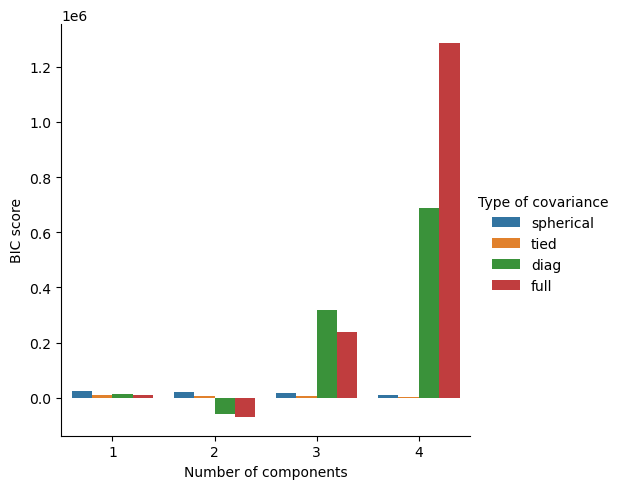

In [20]:
import seaborn as sns

sns.catplot(
    data=df,
    kind="bar",
    x="Number of components",
    y="BIC score",
    hue="Type of covariance",
)
plt.show()

In [25]:
print('best means: ',grid_search.best_estimator_.means_)
print('best covariances: ',grid_search.best_estimator_.covariances_)
print('best weights: ', grid_search.best_estimator_.weights_)
print('best covariance type and n_components: ', grid_search.best_params_)

best means:  [[2.72173274e-01 4.69032315e-01 2.94238612e-01 4.17046892e-01
  5.40287660e-01 9.57784309e-02 6.41610603e-02 3.46435668e-01
  5.28326231e-01 0.00000000e+00 7.12165785e-02 1.31329670e-01
  2.21054903e-01 5.41737014e-02 2.24515863e-01 1.64854871e-01
  1.31868864e-01 2.25566227e-02 5.01258283e-03]
 [3.33239250e-01 1.84725257e-01 2.87893206e-04 2.87893206e-04
  3.80902459e-01 2.17204483e-01 0.00000000e+00 5.28121076e-01
  1.15157282e-03 1.64099127e-02 8.26144656e-02 1.43946603e-04
  4.31839808e-04 9.29786484e-02 2.11327353e-01 1.88443076e-01
  3.44885166e-01 7.02459421e-02 3.12364128e-02]]
best covariances:  [[[ 2.30177161e-01  7.01935522e-02 -4.29907734e-02 -6.83957723e-02
   -1.27824967e-02  4.56499886e-02 -1.14478264e-02 -6.00164435e-03
    1.51025960e-02  0.00000000e+00  1.37376992e-02  5.09732567e-02
   -4.16186801e-02  7.34853532e-03 -2.60663834e-02  5.13134294e-02
    6.13909331e-02  6.89340551e-03  1.14200034e-03]
  [ 7.01935522e-02  2.93864226e-01  5.34732467e-02  4.0

In [29]:
print('best covariance type and n_components: ', grid_search.best_params_['covariance_type'])

best covariance type and n_components:  full


In [30]:
# save to file
gmm_name = 'gmm_cluster'
np.save(gmm_name + '_weights', grid_search.best_estimator_.weights_, allow_pickle=False)
np.save(gmm_name + '_means', grid_search.best_estimator_.means_, allow_pickle=False)
np.save(gmm_name + '_covariances', grid_search.best_estimator_.covariances_, allow_pickle=False)
np.save(gmm_name + '_covariances_type', grid_search.best_params_['covariance_type'], allow_pickle=False)

# reload
means = np.load(gmm_name + '_means.npy')
covar = np.load(gmm_name + '_covariances.npy')
loaded_gmm = GaussianMixture(n_components = len(means), covariance_type='full')
loaded_gmm.precisions_cholesky_ = np.linalg.cholesky(np.linalg.inv(covar))
loaded_gmm.weights_ = np.load(gmm_name + '_weights.npy')
loaded_gmm.means_ = means
loaded_gmm.covariances_ = covar
loaded_gmm.covariance_type_ = np.load(gmm_name + '_covariances_type.npy')

# compare performance on your data between the two GMMs (loaded and saved)
cats2 = loaded_gmm.predict(merged)

/Users/xiaoyangsheng/anaconda3/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  warnings.warn(


In [31]:
cats2

array([1, 1, 1, ..., 1, 0, 1])